# Spam Detector

import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

obtain data

In [2]:
sms = pd.read_csv("data/spam.csv",  encoding='latin-1')[["v1", 'v2']]
sms.columns = ["label", "sms"]

In [3]:
sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The data set contains two columns, "label" contains the label of the whether the sms is a spam text or not, "sms" contains the actual text of the sms

train test split

In [4]:
df_train, df_test, Ytrain, Ytest = train_test_split(sms['sms'], sms["label"], test_size=0.33)

We will now convert everything into numerical format, starting by encoding all the spam sms to 1, all the ham sms to 0

In [5]:
Ytrain = Ytrain.map({"spam": 1, "ham" : 0})
Ytest = Ytest.map({"spam": 1, "ham" : 0})

Now we will preprocess the sms messages using two different types of vectorizers - CountVectorizer and TfidfVectorizer

In [6]:
tf_idf = TfidfVectorizer()
X_train = tf_idf.fit_transform(df_train)
X_test = tf_idf.transform(df_test) # should use the same transformation as the training set

In [7]:
nb = MultinomialNB()
nb.fit(X_train, Ytrain)
print("train score:", nb.score(X_train, Ytrain))
print("test score:", nb.score(X_test, Ytest))

train score: 0.9673185105813019
test score: 0.957041870581838


Naive bayes is doing surprisingly well on this task with tf-idf

Now we can try a different type of vectorization

In [8]:
count_vec = CountVectorizer()
X_train = count_vec.fit_transform(df_train)
X_test = count_vec.transform(df_test)

In [9]:
nb = MultinomialNB()
nb.fit(X_train, Ytrain)
print("train score:", nb.score(X_train, Ytrain))
print("test score:", nb.score(X_test, Ytest))

train score: 0.994106616662202
test score: 0.9853181076672104


count vectorizer is doing slightly better than Tf-idf

## visualize the data

In [10]:
def visualize(label):
    words = ''
    for msg in sms[sms['label'] == label]['sms']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize spam data

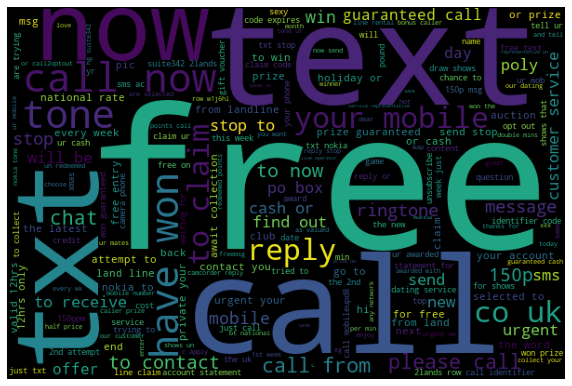

In [11]:
visualize('spam')

Visualize ham data

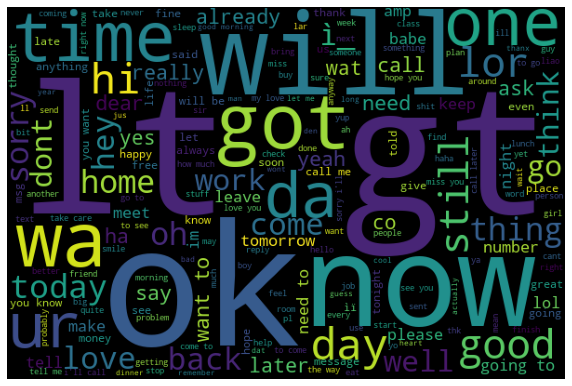

In [12]:
visualize('ham')

Check what we have got wrong

In [13]:
sms["label"] = sms["label"].map({"spam": 1, "ham" : 0})

In [14]:
X = tf_idf.transform(sms['sms'])
sms['predictions'] = nb.predict(X)

# things that should be spam
sneaky_spam = sms[(sms['predictions'] == 0) & (sms['label'] == 1)]['sms']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Hi its LUCY Hubby at me

In [15]:
# things that should be spam
not_actually_spam = sms[(sms['predictions'] == 1) & (sms['label'] == 0)]['sms']
for msg in not_actually_spam:
    print(msg)

Unlimited texts. Limited minutes.
Anytime...
Nokia phone is lovly..
